In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load data
candidates_df = pd.read_csv("../data/candidates1.csv")
candidates_df = candidates_df.drop(columns = ["Unnamed: 0"])
# Drop rows where Affiliation is 3
# candidates_df = candidates_df[candidates_df["Affiliation"].isin(["R", "D", "I"])]
# Rename columns to replace spaces with underscores
candidates_df.columns = candidates_df.columns.str.replace(' ', '_')

In [2]:
candidates_df[candidates_df["Affiliation"]=="3"]

,Name,Affiliation,Incumbent,Winner,Vote_%,Cash_Raised,Cash_Spent,State,District_Number
92,Angelica Duenas,3,0,0,43.4,78083.0,76627.0,CA,29
143,Chris Milton,3,0,0,1.0,12012.0,12012.0,CO,3
148,Rebecca Keltie,3,0,0,0.8,2552.0,1495.0,CO,5
151,Jaimie Kulikowski,3,0,0,0.9,72293.0,110645.0,CO,6
161,Justin Paglino,3,0,0,1.5,29200.0,28670.0,CT,3
250,Jimmy Cooper,3,0,0,NaN,8542.0,8528.0,GA,8
268,Jonathan Hoomanawanui,3,0,0,2.2,1883.0,1522.0,HI,2
285,Tracy Jennings,3,0,0,6.2,65283.0,65283.0,IL,7
406,Jean-Michel Creviere,3,0,0,0.7,281.0,1207.0,MI,2
441,Chris Kelley,3,0,0,NaN,249583.0,249583.0,MN,5


In [3]:
#Get a list of district numbers for each state (Could also be obtained by scraping)
states = candidates_df["State"].unique()
states_dists_list = []
for state in states:
    states_dists_list.append({"State":state, "Districts":list(candidates_df[candidates_df["State"]==state]["District_Number"].unique())})
states_dists_df = pd.DataFrame(states_dists_list)

In [4]:
states_dists_df[states_dists_df["State"]=="LA"]

,State,Districts
17,LA,"[1, 2, 3, 4, 5, 6]"


In [5]:
#iFunctions to answer questions about the winning candidate in each district


def most_cash_raised_was_winner(state, district):
    most_cash_raised = candidates_df[(candidates_df["State"]== state) & (candidates_df["District_Number"]== district)].sort_values(by="Cash_Raised", ascending=False).iloc[0]
    return most_cash_raised["Winner"] == 1

def most_cash_spent_was_winner(state, district):
    most_cash_spent = candidates_df[(candidates_df["State"]== state) & (candidates_df["District_Number"]== district)].sort_values(by="Cash_Spent", ascending=False).iloc[0]
    return most_cash_spent["Winner"] == 1

def incumbent_was_winner(state, district):
    cands = candidates_df[(candidates_df["State"]== state) & (candidates_df["District_Number"]== district)]
    if len(cands[cands["Winner"]==1])>0 and len(cands[cands["Incumbent"]==1])>0:
        winner = cands[cands["Winner"]==1].iloc[0] 
        return winner["Incumbent"] == 1
    return None






In [6]:
questions_list = []

# Iterate over each state and its districts
for index, row in states_dists_df.iterrows():
    state = row['State']
    districts = row['Districts']
    for dist in districts:
        try:
            questions_list.append({"State": state, 
                                "District": dist, 
                                "Most Cash Raised Won": most_cash_raised_was_winner(state, dist),
                                "Most Cash Spent Won": most_cash_spent_was_winner(state, dist),
                                "Incumbent Won": incumbent_was_winner(state, dist)
                                })
        except IndexError as e:
            print(state, dist)
questions_df = pd. DataFrame(questions_list)



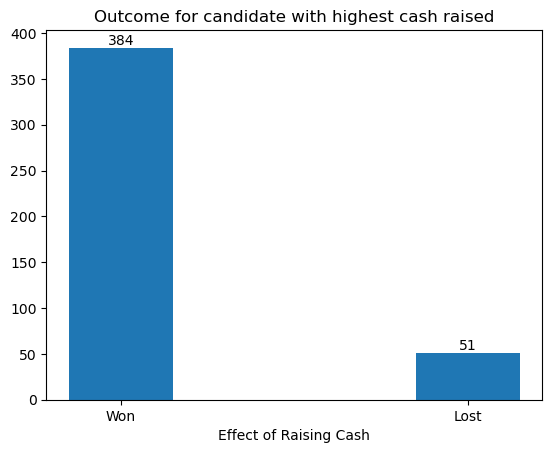

In [7]:
value_counts = questions_df["Most Cash Raised Won"].value_counts()


# Create a bar chart with custom labels and specified bar width
plt.bar(['Won', 'Lost'], value_counts.values, width=0.3)

# Add labels and title
plt.xlabel("Effect of Raising Cash")
plt.title("Outcome for candidate with highest cash raised")

# Display the numerical values on the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

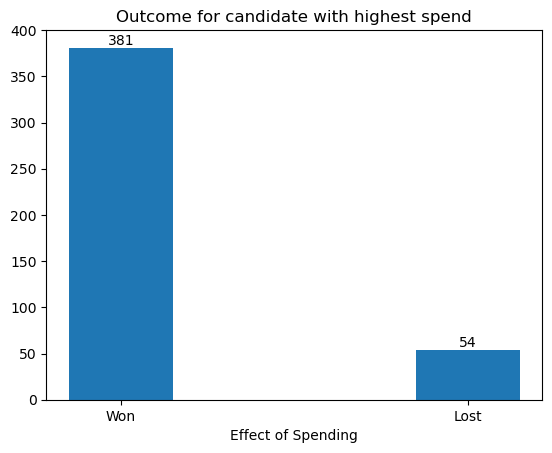

In [8]:
value_counts = questions_df["Most Cash Spent Won"].value_counts()


# Create a bar chart with custom labels and specified bar width
plt.bar(['Won', 'Lost'], value_counts.values, width=0.3)

# Add labels and title
plt.xlabel("Effect of Spending")
plt.title("Outcome for candidate with highest spend")

# Display the numerical values on the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

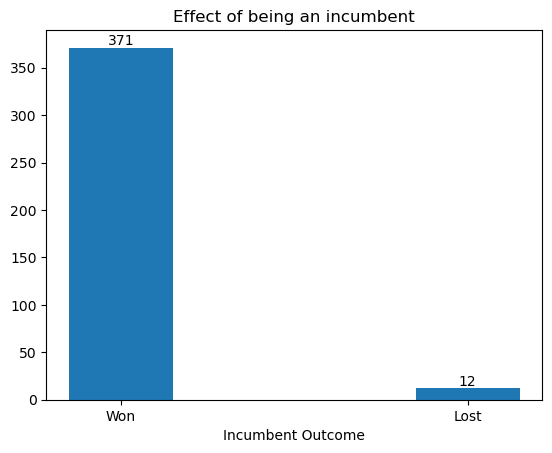

In [9]:
value_counts = questions_df["Incumbent Won"].value_counts()


# Create a bar chart with custom labels and specified bar width
plt.bar(['Won', 'Lost'], value_counts.values, width=0.3)

# Add labels and title
plt.xlabel("Incumbent Outcome")
plt.title("Effect of being an incumbent")

# Display the numerical values on the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

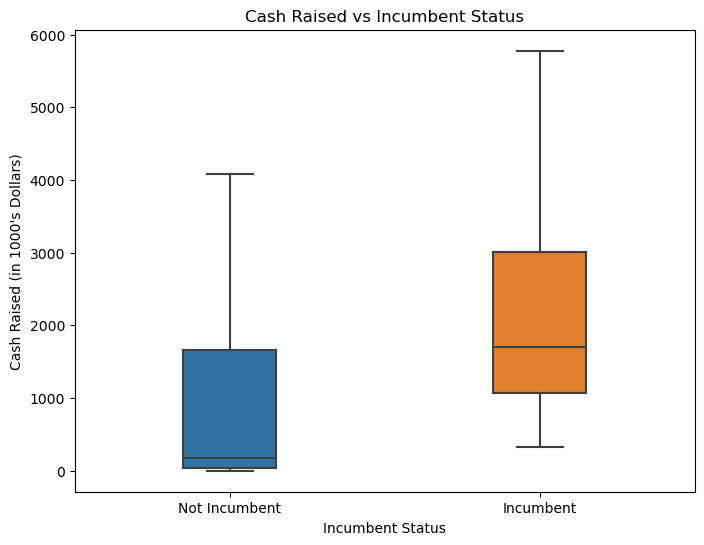

In [10]:
df = candidates_df.copy()

# Create a side-by-side box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size

# Convert 'Cash Raised' to thousands of dollars
df['Cash Raised (K)'] = df['Cash_Raised'] / 1000

sns.boxplot(x='Incumbent', y='Cash Raised (K)', data=df, showfliers=False, width=0.3)

# Set the x-axis labels for Incumbent values
plt.xticks([0, 1], ['Not Incumbent', 'Incumbent'])

# Add labels and a title
plt.xlabel("Incumbent Status")
plt.ylabel("Cash Raised (in 1000's Dollars)")
plt.title("Cash Raised vs Incumbent Status")

# Show the plot
plt.show()

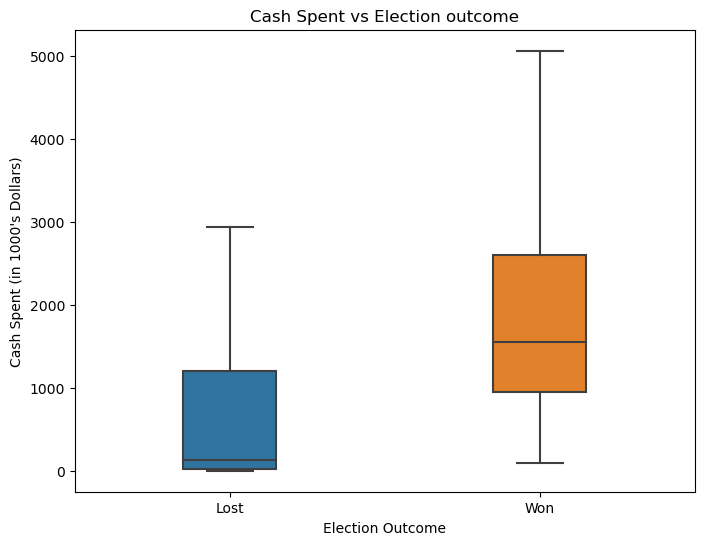

In [11]:

#Cash Spent by Winner
df = candidates_df.copy()

# # Filter the DataFrame for Incumbent = 0 and Incumbent = 1
# df_winner_0 = df[df['Winner'] == 0]
# df_winner_1 = df[df['Winner'] == 1]

# Create a side-by-side box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size

# Convert 'Cash Raised' to thousands of dollars
df['Cash Spent (K)'] = df['Cash_Spent'] / 1000

sns.boxplot(x='Winner', y='Cash Spent (K)', data=df, showfliers=False, width=0.3)

# Set the x-axis labels for Incumbent values
plt.xticks([0, 1], ['Lost', 'Won'])

# Add labels and a title
plt.xlabel("Election Outcome")
plt.ylabel("Cash Spent (in 1000's Dollars)")
plt.title("Cash Spent vs Election outcome")

# Show the plot
plt.show()

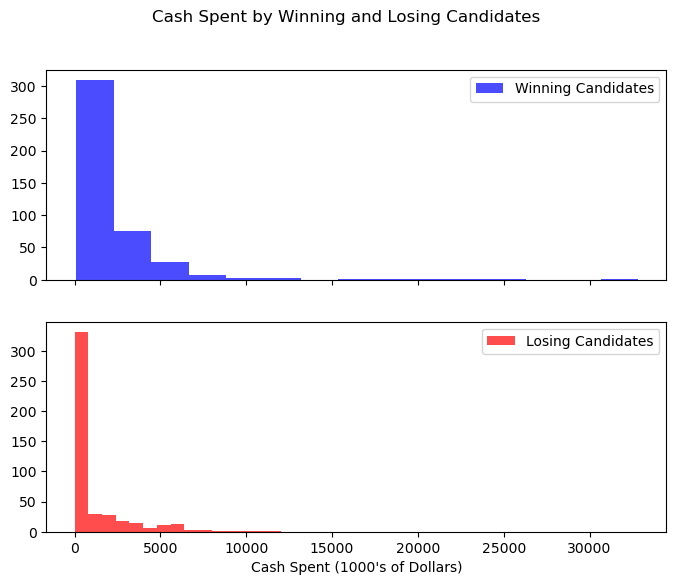

In [12]:
df = candidates_df.copy()

# Separate data for winning and losing candidates
winning_candidates = df[df['Winner'] == 1]
losing_candidates = df[df['Winner'] == 0]

# Create subplots for the histograms
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot histograms for Cash Spent
axes[0].hist(winning_candidates['Cash_Spent']/1000, bins=15, color='blue', alpha=0.7, label='Winning Candidates')
axes[1].hist(losing_candidates['Cash_Spent']/1000, bins=15, color='red', alpha=0.7, label='Losing Candidates')

# Set labels and titles
# axes[0].set_ylabel("Frequency")
# axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Cash Spent (1000's of Dollars)")

# Add legends
axes[0].legend()
axes[1].legend()

# Set a common title for the subplots
plt.suptitle("Cash Spent by Winning and Losing Candidates")

# Show the plot
plt.show()

In [13]:
grouped_candidates = candidates_df.groupby(['State', 'District_Number'])


# Calculate the total cash raised for each district
total_cash_raised_per_district = grouped_candidates['Cash_Raised'].transform('sum')
total_cash_spent_per_district = grouped_candidates['Cash_Spent'].transform('sum')

# Calculate the percentage of Cash Raised for each candidate
candidates_df['Cash_Raised_perc'] = (candidates_df['Cash_Raised'] / total_cash_raised_per_district) * 100
candidates_df['Cash_Spent_perc'] = (candidates_df['Cash_Spent'] / total_cash_spent_per_district) * 100


In [14]:
candidates_df[(candidates_df["State"]=="TN") & (candidates_df["District_Number"] == 7)].sort_values(by="Cash_Raised_perc", ascending=False)

,Name,Affiliation,Incumbent,Winner,Vote_%,Cash_Raised,Cash_Spent,State,District_Number,Cash_Raised_perc,Cash_Spent_perc
719,Mark Green,R,1,1,69.9,1194960.0,935487.0,TN,7,85.110566,81.792858
720,Kiran Sreepada,D,0,0,27.3,206644.0,207191.0,TN,7,14.718139,18.115424
721,Ronald Brown,I,0,0,2.2,1750.0,0.0,TN,7,0.124643,0.000000
722,Scott Vieira Jr,I,0,0,0.6,655.0,1049.0,TN,7,0.046652,0.091718


In [15]:
model = smf.logit('Winner ~ Cash_Spent_perc + Incumbent', data = candidates_df).fit()

Optimization terminated successfully.
         Current function value: 0.182477
         Iterations 8


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  892
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                  0.7365
Time:                        20:28:39   Log-Likelihood:                -162.77
converged:                       True   LL-Null:                       -617.78
Covariance Type:            nonrobust   LLR p-value:                2.456e-198
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.3750      0.333    -13.137      0.000      -5.028      -3.722
Cash_Spent_perc     0.0623      0.006     10.546      0.000       0.051       0.074
Incumbent           3.2073      0.339      9.467      0.000       2.543       3.871
===================================================================================
"""